<h1 align=center><font size=6>Predicción del precio de un vehículo 🚗</font></h1>

<h2 align=center><font size=5>Laboratorio 1: Data Wrangling</font></h2>

<h3><font size=3>Preguntas objetivo: </p></p>
    - Cuál es el ritmo de consumo de combustible (L/100km) de un automovil de diesel?</p>
    - ¿Qué pasaría si solo nos ocuparamos de las diferencias de precio entre automoviles con altos, medios y pocos caballos de fuerza? ¿Podríamos reacomodarlos dentro de tres "contenedores" para facilitar el análisis?
    </font></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv("cars_data_sin_limpiar.csv", header=None)  

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style", "drive-wheels",
           "engine-location","wheel-base","length","width","height","curb-weight", "engine-type", "num-of-cylinders",
           "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg",
           "price"]

cars.columns = headers
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Identificar los valores faltantes

Algunas columnas tienen datos sin valor que aparecen como "?", se debe reemplazar por NaN el cual es el marcador por defecto de Python para valores faltantes por razones de conveniencia y velocidad de computo. 

In [4]:
cars.replace("?", np.nan, inplace=True)
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

De acuerdo a lo anterior, tenemos entonces 205 filas, con datos faltantes en las siguientes columnas:</p> 

- "normalized-losses": 41 datos faltantes
- "num-of-doors": 2 datos faltantes
- "bore": 4 datos faltantes
- "stroke" : 4 datos faltantes
- "horsepower": 2 datos faltantes
- "peak-rpm": 2 datos faltantes
- "price": 4 datos faltantes

Además se puede observar que algunas columnas tienen asignado erróneamente el tipo.

### Reemplazar o eliminar datos faltantes 
Primero podemos obtener una descripción de los datos para ver su comportamiento.

In [6]:
cars.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,8921
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


Se puede entonces decidir lo siquiente:</p> 

**Reemplazar con la media:**
- "normalized-losses"
- "bore"
- "stroke"
- "horsepower"
- "peak-rpm"
   </p> 
    
**Reemplazar con la frecuencia:** 
- "num-of-doors": se puede reemplazar con "four" ya que es el dato que más se repite
    </p> 
    
**Eliminar datos:**  
- "price": se eliminan las filas con datos faltantes ya que es la variable que se quiere predecir. </p> 

**Nota:** Es importante al momento de calcular la media asignarle tipo "float", ya que tienen asigando erróneamente sus tipos.

In [7]:
# reemplazar con la media
avr_norm_loss = cars["normalized-losses"].astype("float64").mean()
cars["normalized-losses"].replace(np.nan, avr_norm_loss, inplace=True )

avr_bore = cars["bore"].astype("float64").mean()
cars["bore"].replace(np.nan, avr_bore, inplace=True)

avr_stroke = cars["stroke"].astype("float64").mean()
cars["stroke"].replace(np.nan, avr_stroke, inplace=True)

avr_horsepower = cars["horsepower"].astype("float64").mean()
cars["horsepower"].replace(np.nan, avr_horsepower, inplace=True)

avr_rpm = cars["peak-rpm"].astype("float64").mean()
cars["peak-rpm"].replace(np.nan, avr_rpm, inplace=True)

# reemplazar con la frecuencia
freq_num_doors = cars["num-of-doors"].value_counts().idxmax()
cars["num-of-doors"].replace(np.nan, freq_num_doors, inplace=True)

# eliminar filas de la columna price
cars.dropna(subset=["price"], inplace=True)

# restablecer el indice
cars.reset_index(drop=True, inplace=True)

###  Corregir el formato de datos:
Algunas columnas tienen un tipo de dato erróneo, así que se debe corregir entonces:
- "normalized-losses": object -> int64
- "bore": object -> float64
- "stroke": object -> float64
- "horsepower": object -> int64
- "peak-rpm": object -> int64
- "price": object -> int64

In [8]:
cars["normalized-losses"] = cars["normalized-losses"].astype("int64")
cars["bore"] = cars["bore"].astype("float64")
cars["stroke"] = cars["stroke"].astype("float64")
cars["horsepower"] = cars["horsepower"].astype("int64")
cars["peak-rpm"] = cars["peak-rpm"].astype("int64")
cars["price"] = cars["price"].astype("int64")

Se verifica que se hayan asignado los datos correctamente y se hayan reemplazado los nulos:

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

Se tiene finalmente el conjunto de datos limpio con un total de 201 filas, sin valores faltantes y en un formato correcto.

Se analiza nuevamente el comportamiento de los datos:

### Estandarización de los datos 

Convertir las columnas de consumo de combustible "city-mpg" y "highway-mpg" al estándar de consumo en L/100km.

La fórmula de conversión es: L/100km = 235 / m.p.g.

In [10]:
cars["city-L/100km"] = 235/cars["city-mpg"]
cars["highway-L/100km"] = 235/cars["highway-mpg"]

cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,13.055556,10.681818


In [11]:
cars["make"].nunique()

22

In [12]:
# crear un conjunto con solo las marcas de carros cuyo tipo de combustible sea diésel y agrupar por la media

cars_diesel = cars[["fuel-type", "make", "city-L/100km", "highway-L/100km"]].loc[cars["fuel-type"]=="diesel"]
cars_diesel_grp = cars_diesel.groupby(["make"], as_index=False).mean()
cars_diesel_grp["city-L/100km"] = np.round(cars_diesel_grp["city-L/100km"], decimals=3)
cars_diesel_grp["highway-L/100km"] = np.round(cars_diesel_grp["highway-L/100km"], decimals=3)

cars_diesel_grp.sort_values("city-L/100km", inplace=True)
cars_diesel_grp["difference"] = cars_diesel_grp["city-L/100km"]-cars_diesel_grp["highway-L/100km"]
cars_diesel_grp["difference"] = np.round(cars_diesel_grp["difference"], decimals=3)
cars_diesel_grp.reset_index(drop=True, inplace=True)
cars_diesel_grp

,make,city-L/100km,highway-L/100km,difference
0,nissan,5.222,4.700,0.522
1,volkswagen,6.544,5.499,1.045
2,toyota,6.976,6.216,0.760
3,mazda,7.054,5.810,1.244
4,peugot,8.796,8.033,0.763
5,volvo,9.038,8.704,0.334
6,mercedes-benz,10.682,9.400,1.282


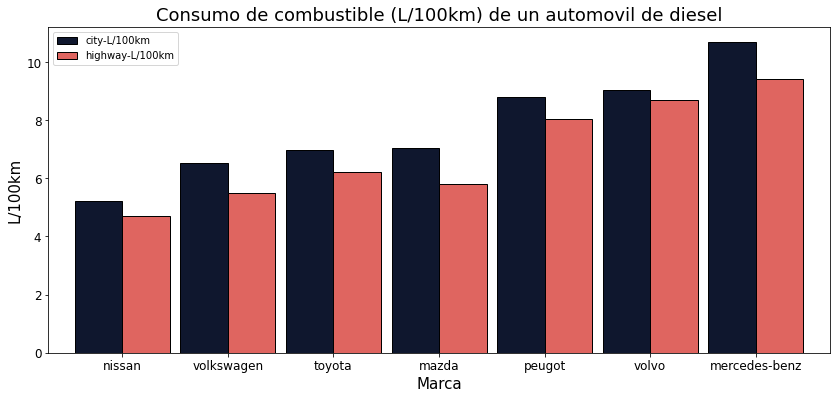

In [14]:
cars_diesel_grp.plot(kind="bar", x="make", y=["city-L/100km", "highway-L/100km"], color=["#0f172e", "#df6560"], 
                     width=0.9, edgecolor="black")
plt.xticks(rotation=0, size=12)
plt.yticks(size=12)
plt.title("Consumo de combustible (L/100km) de un automovil de diesel", size=18)
plt.xlabel("Marca", size=15)
plt.ylabel("L/100km", size=15)
plt.rcParams["figure.figsize"] = (14, 6)
plt.savefig("consumo-diesel.jpg")

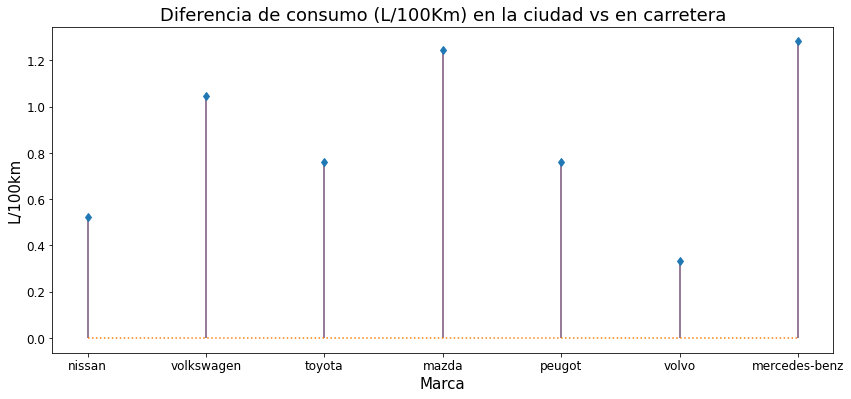

In [15]:
plt.stem(cars_diesel_grp["make"], cars_diesel_grp["difference"], linefmt="#755076", markerfmt="d", basefmt=":")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Diferencia de consumo (L/100Km) en la ciudad vs en carretera", size=18)
plt.xlabel("Marca", size=15)
plt.ylabel("L/100km", size=15)
plt.rcParams["figure.figsize"] = (8, 5)
plt.savefig("diferencia-diesel.jpg")

### Discretización de los datos
Se deben crear 3 bins o "contenedores" para transformar la variable númerica "horsepower" en una variable agrupada en tres intervalos: altos, medios y pocos caballos de fuerza.

In [16]:
# Crear los bins
bins = np.linspace(min(cars["horsepower"]), max(cars["horsepower"]), 4)

# crear ls lista con los nombres de los bins
bins_label = ["Low", "Medium", "High"]

# crear la columna en el conjunto de datos
cars["horsepower-binned"] = pd.cut(cars["horsepower"], bins, labels=bins_label, include_lowest=True)
cars[['horsepower','horsepower-binned']].head(5)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [17]:
cars["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

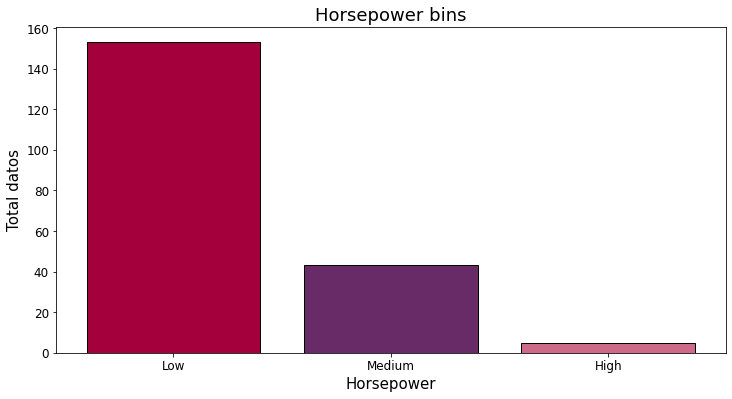

In [19]:
plt.bar(bins_label, cars["horsepower-binned"].value_counts(), edgecolor="black", color=["#a4003c", "#682b67", "#cd6a8a"])
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Horsepower", size=15)
plt.ylabel("Total datos", size=15)
plt.title("Horsepower bins", size=18)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("Horsepower-bins.jpg")

In [20]:
car_hp_price = cars[["horsepower-binned", "price"]]
car_hp_price_grp = car_hp_price.groupby(["horsepower-binned"], as_index=False).mean()
car_hp_price_grp["price"] = np.round(car_hp_price_grp["price"], decimals=3)
car_hp_price_grp

,horsepower-binned,price
0,Low,9989.752
1,Medium,22486.465
2,High,31856.600


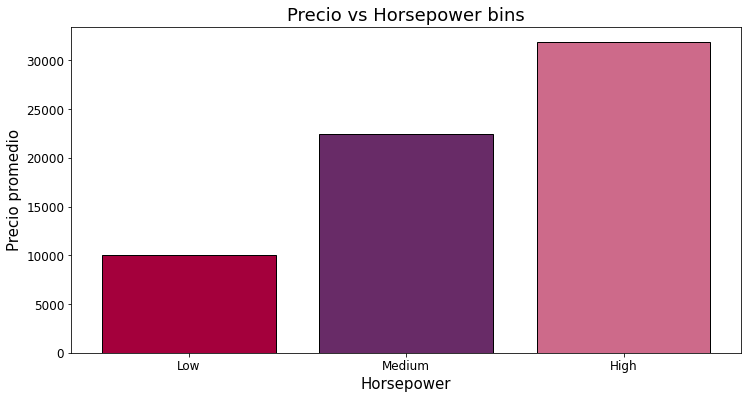

In [21]:
plt.bar(car_hp_price_grp["horsepower-binned"], car_hp_price_grp["price"], edgecolor="black", 
        color=["#a4003c", "#682b67", "#cd6a8a"])
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Horsepower", size=15)
plt.ylabel("Precio promedio", size=15)
plt.title("Precio vs Horsepower bins", size=18)
plt.rcParams["figure.figsize"] = (12, 6)
plt.savefig("Hpbins-price.jpg")

## Conclusiones

#### Respecto al consumo de combustible (L/100km) de un automovil de diesel se concluye lo siguiente:
    - De las 22 marcas de carro en el conjunto de datos, solo siete tienen asociado combustible de tipo diesel.
    - La marca "mercedes-benz" es la que más consume combustible por cada 100km y la marca "nissan" es la que menos consume.
    - La marca "volvo" es la que menos diferencia presenta entre el consumo en la ciudad y en carretera.
    - Las marcas "merces-benz" y "mazda" son las que más diferencia tienen entre el consumo en la ciudad y en carretera.
    - Las marcas "toyota" y "peugot" tienen un comportamiento parecido respecto a la diferencia de consumo en la ciudad y en carretera.
    
    

#### Respecto a las diferencias de precio entre automoviles con altos, medios y pocos horsepower se concluye lo siguiente:
    - El 76.1% de los datos pertenecen a la categoría de "pocos" horsepower. 
    - El 21.4% de los datos pertenecen a la categoría de "medios" horsepower.
    - Tan solo el 2.5% de los datos pertenecen a la categoría de "altos" horsepower.
    - Los automoviles de categoría "pocos" tienen un costo promedio de 9989.752
    - Los automoviles de categoría "medios" tienen un costo promedio de 22486.465
    - Los automoviles de categoría "pocos" tienen un costo promedio de 31856.600
    - Respecto a lo anterior, entonces se puede decir que la potencia del vehículo influye fuertemente en su precio, aunque se presentan con mayor frecuencia los que tienen baja potencia.